In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,plot_roc_curve,accuracy_score,recall_score
from sklearn.metrics import plot_confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.models import Model
from keras.models import load_model
import matplotlib.pyplot as plt

# Read Data

In [2]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 97% 64.0M/66.0M [00:03<00:00, 23.9MB/s]
100% 66.0M/66.0M [00:03<00:00, 18.2MB/s]


In [6]:
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [3]:
cc = pd.read_csv("/content/creditcard.csv")

In [4]:
cc

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Preprocessing

In [5]:
# Checking for missing values
cc.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# Checking for duplication
cc.duplicated().sum()

1081

In [7]:
cc = cc.drop_duplicates()
cc.duplicated().sum()

0

## Visualization

In [12]:
lis=["Not Fraud","Frauds"]
fraud_or_not = cc["Class"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]
fig = px.pie(values=cc['Class'].value_counts(), names=lis , width=800, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="percentage between Frauds & genuin transactions")
fig.show()

Time of transaction vs Amount by class:

In [13]:
fraud=cc[cc['Class']==1]
genuine=cc[cc['Class']==0]

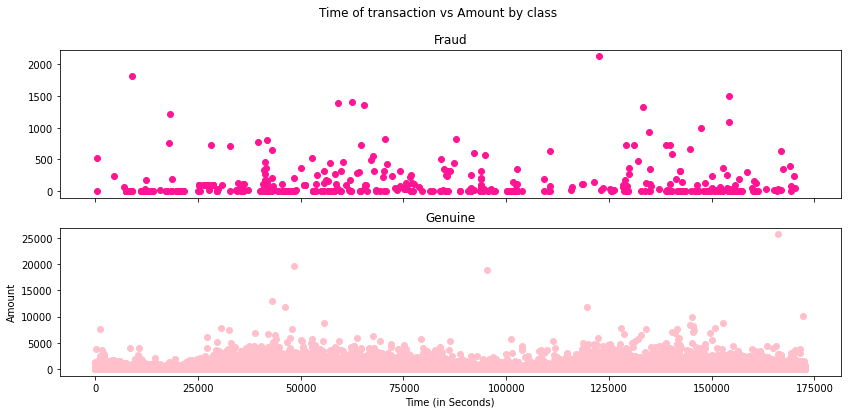

In [14]:
from pylab import rcParams

rcParams['figure.figsize'] = 14, 6
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount,color = 'deeppink')
ax1.set_title('Fraud')
ax2.scatter(genuine.Time, genuine.Amount,color = 'pink')
ax2.set_title('Genuine')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

## Standardization

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
std_scaler = StandardScaler()
cc['Scaled_Amount']=std_scaler.fit_transform(cc['Amount'].values.reshape(-1,1))

In [10]:
cc.drop(['Amount','Time'],axis=1,inplace=True)

In [11]:
cc.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073813


In [12]:
X = cc.drop('Class', axis = 1)
y = cc['Class']

## Split

In [20]:
from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(
                        X,y,
                        test_size = 0.30, random_state = 101)

In [21]:
xtrnp = np.array(X_train)
xtenp = np.array(X_test)
Xtrain = xtrnp.reshape(198608,29,1)
Xtest = xtenp.reshape(85118,29,1)

In [22]:
X_train.shape

(198608, 29)

In [23]:
X_test.shape

(85118, 29)

In [24]:
Xtrain.shape, Xtest.shape

((198608, 29, 1), (85118, 29, 1))

# Unbalanced

## SVM + Gridsearch

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# defining parameter range
param_grid = {'C': [0.1, 1], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}

            
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,cv=3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.559 total time=   0.0s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.576 total time=   0.0s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.576 total time=   0.0s
[CV 1/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.559 total time=   0.0s
[CV 2/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.576 total time=   0.0s
[CV 3/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.576 total time=   0.0s
[CV 1/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.912 total time=   0.0s
[CV 2/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.909 total time=   0.0s
[CV 3/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.818 total time=   0.0s
[CV 1/3] END ..........C=1, gamma=1, kernel=rbf;, score=0.559 total time=   0.0s
[CV 2/3] END ..........C=1, gamma=1, kernel=rbf;, score=0.576 total time=   0.0s
[CV 3/3] END ..........C=1, gamma=1, kernel=rbf;,

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [51]:
# print best parameter after tuning
best_params = grid.best_params_
print(best_params)

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


In [55]:
c = best_params['C']
gamma = best_params['gamma']
kernel = best_params['kernel']

In [49]:
# print how our model looks after hyper-parameter tuning
print(grid.best_score_)

0.9099821746880571


### Optimized Model

In [56]:
svc = SVC(kernel = kernel, gamma = gamma, C = c)

In [1]:
svc.fit(X_train, y_train)

In [ ]:
unbalanced_svm_pred = svc.predict(X_test)

In [ ]:
np.save('unbalanced_svm_pred', np.array(unbalanced_svm_pred))

## CNN + Genetics

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.callbacks import EarlyStopping

In [27]:
def CNN_model( f1, f2, k, a1, a2, d1, d2, op, ep):
  print('Building model')
  model = Sequential()
  model.add(Conv1D(filters = f1, kernel_size = k, activation = a1, input_shape = (29,1)))
  model.add(MaxPooling1D(2))
  model.add(Flatten())
  model.add(Dropout(rate = d1))
  model.add(Dense(units = f2, activation = a2))
  model.add(Dropout(rate = d2))
  model.add(Dense(1, activation= "relu"))

  model.compile(loss = "binary_crossentropy", optimizer = op, metrics = ["accuracy"])
  model.fit(Xtrain, y_train, epochs=ep, batch_size = 100, verbose=0)

  return model

In [28]:
from random import choice
from random import uniform
from numpy.random import randint

In [29]:
def initialization():  
  parameters = {}
  f1 = choice([16,32])
  parameters["f1"] = f1
  f2 = choice([4,16])
  parameters["f2"] = f2
  k = choice([1,3,5])
  parameters["k"] = k
  a1 = choice(["relu"])
  parameters["a1"] = a1
  a2 = choice(["relu"])
  parameters["a2"] = a2
  d1 = round(uniform(0.1, 0.5), 1)
  parameters["d1"] = d1
  d2 = round(uniform(0.1, 0.5), 1)
  parameters["d2"] = d2
  op = choice(["sgd", "adam"])
  parameters["op"] = op
  ep = randint(3,7)
  parameters["ep"] = ep
  return parameters

In [30]:
def generate_population(n):
  print('Generate population')
  population = []
  for i in range(n):
    chromosome = initialization()
    population.append(chromosome)
  return population

In [31]:
# Fitness evaluation metric: Classification Accuracy 
def fitness_evaluation(model):
  metrics = model.evaluate(Xtest, y_test)
  return metrics[1]

In [32]:
# Roulette wheel selection method
def selection(population_fitness):
  total = sum(population_fitness)
  percentage = [round((x/total) * 100) for x in population_fitness]
  selection_wheel = []
  for pop_index,num in enumerate(percentage):
    selection_wheel.extend([pop_index]*num)
  parent1_ind = choice(selection_wheel)
  parent2_ind = choice(selection_wheel)
  return [parent1_ind, parent2_ind]

In [36]:
def crossover(parent1, parent2):
  child1 = {}
  child2 = {}

  child1["f1"] = choice([parent1["f1"], parent2["f1"]])
  child1["f2"] = choice([parent1["f2"], parent2["f2"]])

  child2["f1"] = choice([parent1["f1"], parent2["f1"]])
  child2["f2"] = choice([parent1["f2"], parent2["f2"]])

  child1["k"] = choice([parent1["k"], parent2["k"]])
  child2["k"] = choice([parent1["k"], parent2["k"]])

  child1["a1"] = parent1["a2"]
  child2["a1"] = parent2["a2"]

  child1["a2"] = parent2["a1"]
  child2["a2"] = parent1["a1"]

  child1["d1"] = parent1["d1"]
  child2["d1"] = parent2["d1"]

  child1["d2"] = parent2["d2"]
  child2["d2"] = parent1["d2"]

  child1["op"] = parent2["op"]
  child2["op"] = parent1["op"]

  child1["ep"] = parent1["ep"]
  child2["ep"] = parent2["ep"]
  return [child1, child2]

In [37]:
def mutation(chromosome):
  flag = randint(0,40)
  if flag <= 20:
    chromosome["ep"] += randint(0, 10)
  return chromosome

In [38]:
generations = 3
threshold = 90
num_pop = 5
condition = False

population = generate_population(num_pop)

for generation in range(generations):
  print('Generation:', generation)

  population_fitness = []
  for chromosome in population:
    f1 = chromosome["f1"]
    f2 = chromosome["f2"]
    k = chromosome["k"]
    a1 = chromosome["a1"]
    a2 = chromosome["a2"]
    d1 = chromosome["d1"]
    d2 = chromosome["d2"]
    op = chromosome["op"]
    ep = chromosome["ep"]

    try:
      print(f1, f2, k, a1, a2, d1, d2, op, ep)
      model = CNN_model(f1, f2, k, a1, a2, d1, d2, op, ep)
      print('Built')
      acc = fitness_evaluation(model)
      if acc == 0.999:
        print('Found the Best Model!')
        print('Params: f1, f2, k, a1, a2, d1, d2, op, ep',f1, f2, k, a1, a2, d1, d2, op, ep)
        print('Accuracy:',acc)
        ff1 = f1
        ff2 = f2 
        fk = k
        fa1 = a1
        fa2 = a2
        fd1 = d1 
        fd2 = d2 
        fop = op 
        fep = ep
        condition = True
        break
      print("Parameters: ", chromosome)
      print("Accuracy: ", round(acc,3))
    except:
      acc=0
      print("Parameters: ", chromosome)
      print("Invalid parameters - Build fail")

    population_fitness.append(acc)
  
  if condition == True:
    break
  parents_ind = selection(population_fitness)
  parent1 = population[parents_ind[0]]
  parent2 = population[parents_ind[1]]

  children = crossover(parent1, parent2)
  child1 = mutation(children[0])
  child2 = mutation(children[1])

  population.append(child1)
  population.append(child2)

  first_min = min(population_fitness)
  first_min_ind = population_fitness.index(first_min)
  population.remove(population[first_min_ind])
  second_min = min(population_fitness)
  second_min_ind = population_fitness.index(second_min)
  population.remove(population[second_min_ind])

  ff1 = f1
  ff2 = f2 
  fk = k
  fa1 = a1
  fa2 = a2
  fd1 = d1 
  fd2 = d2 
  fop = op 
  fep = ep

generate_population
Generation: 0
32 16 1 relu relu 0.3 0.1 adam 3
Building model
Built
2660/2660 [==============================] - 7s 2ms/step - loss: 0.0250 - accuracy: 0.9984
Parameters:  {'f1': 32, 'f2': 16, 'k': 1, 'a1': 'relu', 'a2': 'relu', 'd1': 0.3, 'd2': 0.1, 'op': 'adam', 'ep': 3}
Accuracy:  0.998
32 4 5 relu relu 0.2 0.3 adam 3
Building model
Built
2660/2660 [==============================] - 6s 2ms/step - loss: 0.0250 - accuracy: 0.9984
Parameters:  {'f1': 32, 'f2': 4, 'k': 5, 'a1': 'relu', 'a2': 'relu', 'd1': 0.2, 'd2': 0.3, 'op': 'adam', 'ep': 3}
Accuracy:  0.998
16 16 1 relu relu 0.3 0.4 adam 5
Building model
Built
2660/2660 [==============================] - 6s 2ms/step - loss: 0.0250 - accuracy: 0.9984
Parameters:  {'f1': 16, 'f2': 16, 'k': 1, 'a1': 'relu', 'a2': 'relu', 'd1': 0.3, 'd2': 0.4, 'op': 'adam', 'ep': 5}
Accuracy:  0.998
16 16 5 relu relu 0.3 0.3 adam 3
Building model
Built
2660/2660 [==============================] - 6s 2ms/step - loss: 0.0250 - accuracy:

### Optimized Model

In [ ]:
unbalanced_model = CNN_model(ff1, ff2, fk, fa1, fa2, fd1, fd2, fop, fep)

In [ ]:
unbalanced_cnn_pred = unbalanced_model.predict(Xtest)

In [ ]:
np.save('unbalanced_cnn_pred', np.array(unbalanced_cnn_pred))

https://towardsdatascience.com/artificial-neural-networks-optimization-using-genetic-algorithm-with-python-1fe8ed17733e

https://github.com/KrishnaManmayi/Hyper-Parameter-Optimization-of-CNN-using-genetic-algorithm/blob/main/Optimization_using_genetic_algorithm_Cifar10_using_CNN.ipynb

# Balanced

## SMOTE

In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
smote=SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [42]:
fig2 = px.pie(values=y_resampled.value_counts(), width=800, height=400, title="Data Balance",color_discrete_sequence=["skyblue","black"])
fig2.show()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 0)

In [44]:
X_train.shape

(453204, 29)

In [45]:
X_test.shape

(113302, 29)

## SVM + Gridsearch

In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 1], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}

            
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,cv=3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

In [ ]:
# print best parameter after tuning
best_params = grid.best_params_
print(best_params)

In [ ]:
c = best_params['C']
gamma = best_params['gamma']
kernel = best_params['kernel']

In [ ]:
# print how our model looks after hyper-parameter tuning
print(grid.best_score_)

### Optimized Model

In [ ]:
svc = SVC(kernel = kernel, gamma = gamma, C = c)

In [ ]:
svc.fit(X_train, y_train)

In [ ]:
balanced_svm_pred = svc.predict(X_test)

In [ ]:
np.save('balanced_svm_pred', np.array(balanced_svm_pred))

## CNN + Genetics

In [ ]:
xtrnp = np.array(X_train)
xtenp = np.array(X_test)
Xtrain = xtrnp.reshape(453204,29,1)
Xtest = xtenp.reshape(113302,29,1)

In [ ]:
generations = 3
threshold = 90
num_pop = 5
condition = False

population = generate_population(num_pop)

for generation in range(generations):
  print('Generation:', generation)

  population_fitness = []
  for chromosome in population:
    f1 = chromosome["f1"]
    f2 = chromosome["f2"]
    k = chromosome["k"]
    a1 = chromosome["a1"]
    a2 = chromosome["a2"]
    d1 = chromosome["d1"]
    d2 = chromosome["d2"]
    op = chromosome["op"]
    ep = chromosome["ep"]

    try:
      print(f1, f2, k, a1, a2, d1, d2, op, ep)
      model = CNN_model(f1, f2, k, a1, a2, d1, d2, op, ep)
      print('Built')
      acc = fitness_evaluation(model)
      if acc == 0.999:
        print('Found the Best Model!')
        print('Params: f1, f2, k, a1, a2, d1, d2, op, ep',f1, f2, k, a1, a2, d1, d2, op, ep)
        print('Accuracy:',acc)
        ff1 = f1
        ff2 = f2 
        fk = k
        fa1 = a1
        fa2 = a2
        fd1 = d1 
        fd2 = d2 
        fop = op 
        fep = ep
        condition = True
        break
      print("Parameters: ", chromosome)
      print("Accuracy: ", round(acc,3))
    except:
      acc=0
      print("Parameters: ", chromosome)
      print("Invalid parameters - Build fail")

    population_fitness.append(acc)
  
  if condition == True:
    break
  parents_ind = selection(population_fitness)
  parent1 = population[parents_ind[0]]
  parent2 = population[parents_ind[1]]

  children = crossover(parent1, parent2)
  child1 = mutation(children[0])
  child2 = mutation(children[1])

  population.append(child1)
  population.append(child2)

  first_min = min(population_fitness)
  first_min_ind = population_fitness.index(first_min)
  population.remove(population[first_min_ind])
  second_min = min(population_fitness)
  second_min_ind = population_fitness.index(second_min)
  population.remove(population[second_min_ind])

  ff1 = f1
  ff2 = f2 
  fk = k
  fa1 = a1
  fa2 = a2
  fd1 = d1 
  fd2 = d2 
  fop = op 
  fep = ep

### Optimized Model

In [ ]:
balanced_model = CNN_model(ff1, ff2, fk, fa1, fa2, fd1, fd2, fop, fep)

In [ ]:
balanced_cnn_pred = balanced_model.predict(Xtest)

In [ ]:
np.save('balanced_cnn_pred', np.array(balanced_cnn_pred))

# Kmeans

Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

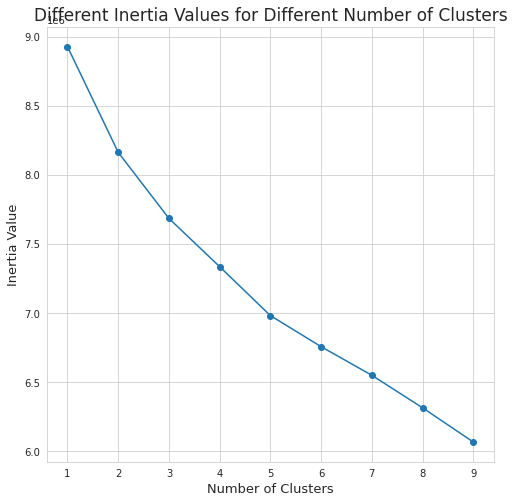

In [24]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

inertia_list = []
for num_clusters in range(1, 10):
    kmeans_model = KMeans(n_clusters=num_clusters, init="k-means++")
    kmeans_model.fit(X)
    inertia_list.append(kmeans_model.inertia_)
    
# plot the inertia curve
plt.plot(range(1,10),inertia_list)
plt.scatter(range(1,10),inertia_list)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Different Inertia Values for Different Number of Clusters", size=17)

In [25]:
kmeans = KMeans(n_clusters=2, random_state=0,max_iter=200).fit(X)

## Visualization

In [26]:
from sklearn.decomposition import PCA
 
pca = PCA(2)
 
#Transform the data
d = pca.fit_transform(X)
 
d.shape

(283726, 2)

KeyboardInterrupt: ignored

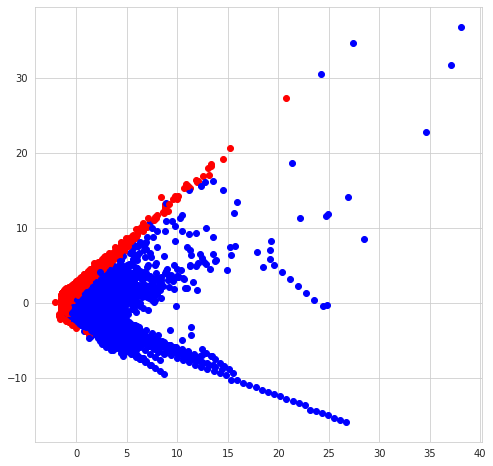

In [27]:
import matplotlib.pyplot as plt

labels = kmeans.labels_
for i in range(len(X)):
  if labels[i]==0:
    plt.scatter(d[i][0] , d[i][1] , color = 'red')
  elif labels[i]==1:
    plt.scatter(d[i][0] , d[i][1] , color = 'blue')
  elif labels[i]==2:
    plt.scatter(d[i][0] , d[i][1] , color = 'green')
plt.show()